Loan Rejection or Approval Status Prediction
https://www.kaggle.com/datasets/bsugiarto9/loan-status-prediction-with-added-nans

In [ ]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

In [ ]:
# import dataset
data = pd.read_csv(r"/content/drive/MyDrive/Machine Learning  - Learning/Loan Approval Test/loan_data_1.csv")

In [ ]:
data

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,376,LP002953,Male,Yes,3+,Graduate,No,5703.0,0.0,128.0,360.0,1.0,Urban,Y
377,377,LP002974,Male,Yes,0,Graduate,No,3232.0,NaN,108.0,360.0,1.0,Rural,Y
378,378,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
379,379,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:
eligible = data.groupby(['Loan_Status']).aggregate({
    'Loan_ID' : 'count'
})
eligible = pd.DataFrame(eligible).reset_index()

In [ ]:
eligible.rename(columns={
    'Loan_ID':'total_user'
}, inplace=True)

fig = px.bar(eligible, x='Loan_Status', y='total_user')
fig.show()

In [ ]:
# gender distribution
print(data.Gender.value_counts())

Gender
Male      291
Female     85
Name: count, dtype: int64


In [ ]:
# rename gender data
def rename_gender(Gender):
  if Gender == 'Male':
    return 1
  else:
    return 0

data['Gender'] = data.Gender.apply(rename_gender)

In [ ]:
# maried status distribution
print(data.Married.value_counts())

Married
Yes    228
No     153
Name: count, dtype: int64


In [ ]:
# rename married status data
def rename_married(Married):
  if Married == 'Yes':
    return 1
  else:
    return 0

data['Married'] = data.Married.apply(rename_married)

In [ ]:
# dependent distribution
print(data.Dependents.value_counts())

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64


In [ ]:
# Replace '3+' with '3' in the 'Dependents' column
data['Dependents'] = data['Dependents'].str.replace('3+', '3', regex=False)

# Convert the 'Dependents' column to numeric
data['Dependents'] = pd.to_numeric(data['Dependents'])

In [ ]:
# education distribution
print(data.Education.value_counts())

Education
Graduate        274
Not Graduate    101
Name: count, dtype: int64


In [ ]:
# replace education data
def replace_education(Education):
  if Education == 'Graduate':
    return 1
  else:
    return 0

data['Education'] = data.Education.apply(replace_education)

In [ ]:
# self employed distribution
print(data.Self_Employed.value_counts())

Self_Employed
No     325
Yes     35
Name: count, dtype: int64


In [ ]:
# replace employed daa
def replace_employed(Self_Employed):
  if Self_Employed == 'Yes':
    return 1
  else:
    return 0

data['Self_Employed'] = data.Self_Employed.apply(replace_employed)

In [ ]:
# property area distributed
print(data.Property_Area.value_counts())

Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64


In [ ]:
# replace property area data
def replace_property_area(Property_Area):
  if Property_Area == 'Urban':
    return 1
  elif Property_Area == 'Semiurban':
    return 2
  else:
    return 3

data['Property_Area'] = data.Property_Area.apply(replace_property_area)

In [ ]:
# loan status distribution
print(data.Loan_Status.value_counts())

Loan_Status
Y    271
N    110
Name: count, dtype: int64


In [ ]:
# replace loan status data
def replace_loan_status(Loan_Status):
  if Loan_Status == 'Y':
    return 1
  else:
    return 0

data['Loan_Status'] = data.Loan_Status.apply(replace_loan_status)

In [ ]:
# check missing data
print(data.isnull().sum())

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               0
Dependents            8
Education             0
Self_Employed         0
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# fill missing data with median
data.fillna(data.median(numeric_only=True), inplace=True)

In [ ]:
# re-check missing data
print(data.isnull().sum())

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
data

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,1,1,1.0,1,0,4583.0,1508.0,128.0,360.0,1.0,3,0
1,1,LP001005,1,1,0.0,1,1,3000.0,0.0,66.0,360.0,1.0,1,1
2,2,LP001006,1,1,0.0,0,0,2583.0,2358.0,120.0,360.0,1.0,1,1
3,3,LP001008,1,0,0.0,1,0,6000.0,0.0,141.0,360.0,1.0,1,1
4,4,LP001013,1,1,0.0,0,0,2333.0,1516.0,95.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,376,LP002953,1,1,3.0,1,0,5703.0,0.0,128.0,360.0,1.0,1,1
377,377,LP002974,1,1,0.0,1,0,3232.0,830.0,108.0,360.0,1.0,3,1
378,378,LP002978,0,0,0.0,1,0,2900.0,0.0,71.0,360.0,1.0,3,1
379,379,LP002979,1,1,3.0,1,0,4106.0,0.0,40.0,180.0,1.0,3,1


check feature correlation from Approved Loan Status

In [ ]:
# Filter Eligible Data
corr = data.drop(['Loan_ID', 'Unnamed: 0'], axis=1)

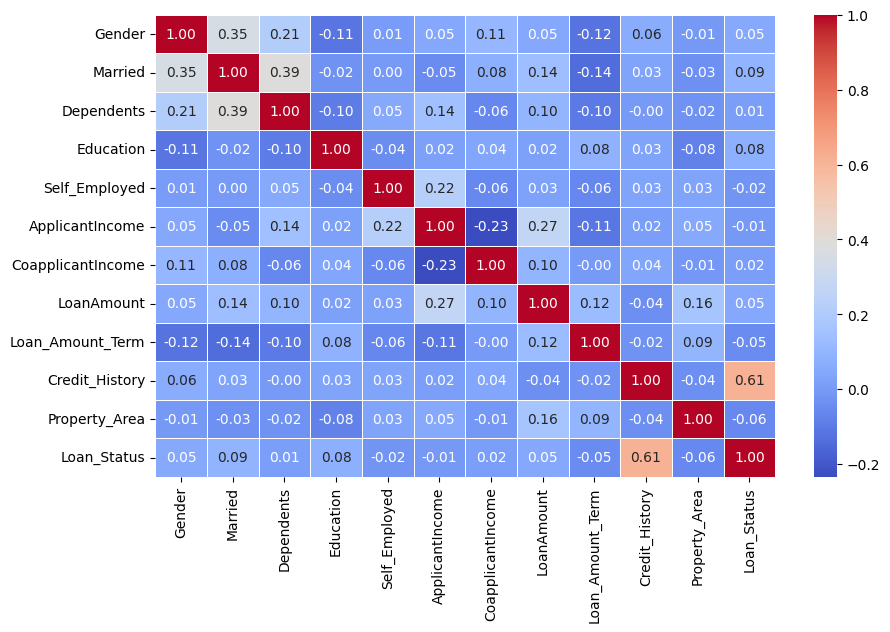

In [ ]:
# Feature Correlation
plt.figure(figsize=(10, 6))
ax = sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Data Modeling Preparation

In [ ]:
data.head(3)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,1,1,1.0,1,0,4583.0,1508.0,128.0,360.0,1.0,3,0
1,1,LP001005,1,1,0.0,1,1,3000.0,0.0,66.0,360.0,1.0,1,1
2,2,LP001006,1,1,0.0,0,0,2583.0,2358.0,120.0,360.0,1.0,1,1


In [ ]:
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

In [ ]:
# split train test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [ ]:
test_user_id = data.loc[X_test.index, 'Loan_ID']

### Model Training

In [ ]:
# Impute missing values with the median
model = LogisticRegression(solver='liblinear', random_state=101)
model.fit(X_train, y_train)

LogisticRegression(random_state=101, solver='liblinear')

In [ ]:
# get prediction class label
y_pred = model.predict(X_test)

In [ ]:
y_pred_proba = model.predict_proba(X_test)

In [ ]:
approval_probabilities = y_pred_proba[:, 1]

In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"\nOverall Model F1 Score on Test Set : {f1:.4f}")
print("\nClassification Report (overall model Performance) : ")
print(classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved']))


Overall Model F1 Score on Test Set : 0.8943

Classification Report (overall model Performance) : 
              precision    recall  f1-score   support

Not Approved       1.00      0.41      0.58        22
    Approved       0.81      1.00      0.89        55

    accuracy                           0.83        77
   macro avg       0.90      0.70      0.74        77
weighted avg       0.86      0.83      0.80        77



In [ ]:
# coefficient indicated the impact of each features
if hasattr(model, 'coef_'):
  coefficients = pd.DataFrame({
      'Feature': X.columns,
      'Coefficient':model.coef_[0]
  }).sort_values(by='Coefficient', ascending=False)
  print("\nFeature Coefficients (Impact on Loan Approval):")
  print(coefficients)


Feature Coefficients (Impact on Loan Approval):
              Feature  Coefficient
10     Credit_History     3.284288
4           Education     0.182848
2             Married     0.158380
8          LoanAmount     0.004367
0          Unnamed: 0     0.001320
7   CoapplicantIncome    -0.000047
6     ApplicantIncome    -0.000098
9    Loan_Amount_Term    -0.003623
3          Dependents    -0.017192
5       Self_Employed    -0.024015
1              Gender    -0.080021
11      Property_Area    -0.295457


In [ ]:
# user prediction scoring
user_scoring_report = pd.DataFrame({
    'Loan_ID': test_user_id,
    'Actual_Loan_Approved': y_test,
    'Predicted_Probability_approval': approval_probabilities,
    'Predicted_status_based_on_threshold': y_pred
})

In [ ]:
user_scoring_report

,Loan_ID,Actual_Loan_Approved,Predicted_Probability_approval,Predicted_status_based_on_threshold
347,LP002776,0,0.160542,0
226,LP002175,1,0.867362,1
74,LP001385,1,0.831761,1
76,LP001398,1,0.777803,1
261,LP002318,0,0.766063,1
...,...,...,...,...
240,LP002234,1,0.828668,1
27,LP001119,0,0.811595,1
341,LP002743,0,0.198136,0
62,LP001316,1,0.820555,1


In [ ]:
# custom threshold to 60% because prediction proba threshold only 50%
custom_threshold = 0.6
user_scoring_report['custom_threshold'] = (user_scoring_report.Predicted_Probability_approval >= custom_threshold).astype(int)

In [ ]:
# rename status for better readibility (Eligible or Not Eligible)
user_scoring_report['default_recommended_status'] = user_scoring_report['Predicted_status_based_on_threshold'].map({0 : 'Not Eligible', 1 : 'Eligible'})
user_scoring_report['custom_recommended_status'] = user_scoring_report['custom_threshold'].map({0 : 'Not Eligible', 1 : 'Eligible'})

In [ ]:
# Sort from Predicted Probability Approval Score
user_scoring_report = user_scoring_report.sort_values(by='Predicted_Probability_approval', ascending=False).reset_index(drop=True)

In [ ]:
# Prediction Distribution
print("\nLoan Status Prediction Distribution:")
print(user_scoring_report.default_recommended_status.value_counts())
print("-----")
print("\nMost Correlated Feature : ")
print(coefficients[coefficients['Coefficient'] > 0])


Loan Status Prediction Distribution:
default_recommended_status
Eligible        68
Not Eligible     9
Name: count, dtype: int64
-----

Most Correlated Feature : 
           Feature  Coefficient
10  Credit_History     3.284288
4        Education     0.182848
2          Married     0.158380
8       LoanAmount     0.004367
0       Unnamed: 0     0.001320
